In [26]:
import numpy as np # Maths and Statistics
import pandas as pd # Data Manipulation
import matplotlib.pyplot as plt # Data Visualization
import seaborn as sns # Data Visualization

In [27]:
orders = pd.read_csv("Orders.csv")
customers = pd.read_csv("Customers.csv")
restaurants = pd.read_csv("Restaurants.csv")

In [28]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Order_ID                1000 non-null   object 
 1   Restaurant_ID           1000 non-null   object 
 2   Order_Date              1000 non-null   object 
 3   Expected_Delivery_Time  1000 non-null   int64  
 4   Actual_Delivery_Time    1000 non-null   int64  
 5   Total_Amount            1000 non-null   float64
 6   Order_Status            1000 non-null   object 
 7   Payment_Method          1000 non-null   object 
 8   Dish_Name               1000 non-null   object 
 9   Customer_ID             1000 non-null   object 
dtypes: float64(1), int64(2), object(7)
memory usage: 78.3+ KB


In [29]:
orders["Order_Date"] = pd.to_datetime(orders["Order_Date"])
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Order_ID                1000 non-null   object        
 1   Restaurant_ID           1000 non-null   object        
 2   Order_Date              1000 non-null   datetime64[ns]
 3   Expected_Delivery_Time  1000 non-null   int64         
 4   Actual_Delivery_Time    1000 non-null   int64         
 5   Total_Amount            1000 non-null   float64       
 6   Order_Status            1000 non-null   object        
 7   Payment_Method          1000 non-null   object        
 8   Dish_Name               1000 non-null   object        
 9   Customer_ID             1000 non-null   object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(6)
memory usage: 78.3+ KB


In [30]:
orders["Month"] = orders["Order_Date"].dt.strftime("%B")
orders

,Order_ID,Restaurant_ID,Order_Date,Expected_Delivery_Time,Actual_Delivery_Time,Total_Amount,Order_Status,Payment_Method,Dish_Name,Customer_ID,Month
0,O0001,R079,2023-02-27 08:00:00,26,29,731.48,Cancelled,Credit Card,Margherita Pizza,C187,February
1,O0002,R010,2023-01-09 18:00:00,35,40,461.67,Cancelled,UPI,Chicken Wings,C036,January
2,O0003,R055,2023-08-08 12:00:00,29,28,557.85,Cancelled,Cash,Egg Fried Rice,C179,August
3,O0004,R072,2023-02-26 22:00:00,35,42,209.42,Cancelled,UPI,Paneer Tikka,C186,February
4,O0005,R097,2023-06-26 12:00:00,33,23,411.99,Cancelled,Cash,Egg Fried Rice,C176,June
...,...,...,...,...,...,...,...,...,...,...,...
995,O0996,R072,2023-08-02 18:00:00,32,35,776.38,Completed,Net Banking,Pasta Alfredo,C163,August
996,O0997,R071,2023-10-10 00:00:00,39,39,840.76,Completed,UPI,Paneer Tikka,C048,October
997,O0998,R010,2023-07-31 06:00:00,45,36,232.90,Completed,Cash,Garlic Naan,C033,July
998,O0999,R100,2023-03-06 12:00:00,34,46,811.29,Completed,UPI,Fish Curry,C147,March


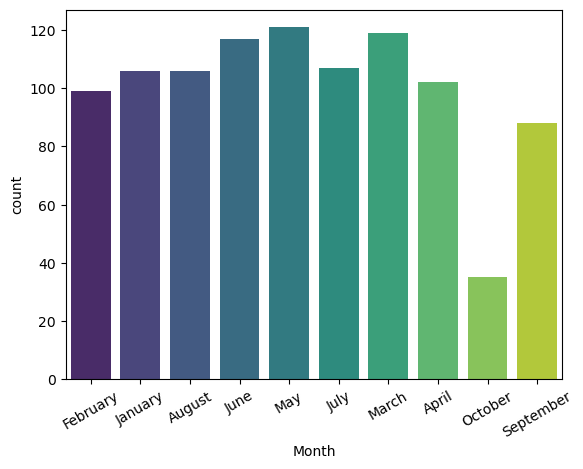

In [31]:
plt.figure.figsize=(10, 5)
sns.countplot(x="Month", data=orders, hue = "Month", palette="viridis")
plt.xticks(rotation=30)
plt.show()

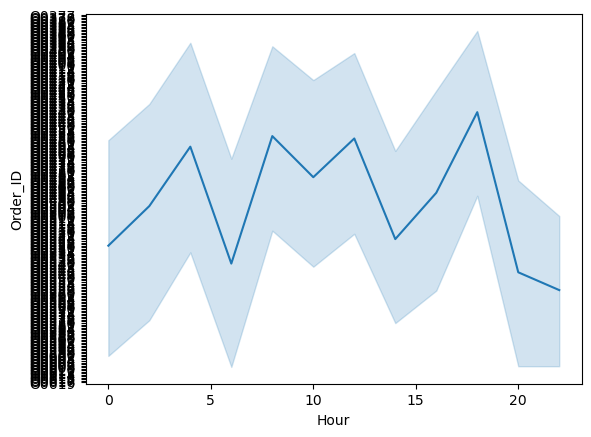

In [32]:
orders["Hour"] = orders["Order_Date"].dt.hour
sns.lineplot(x="Hour", y="Order_ID", data=orders)
plt.show()

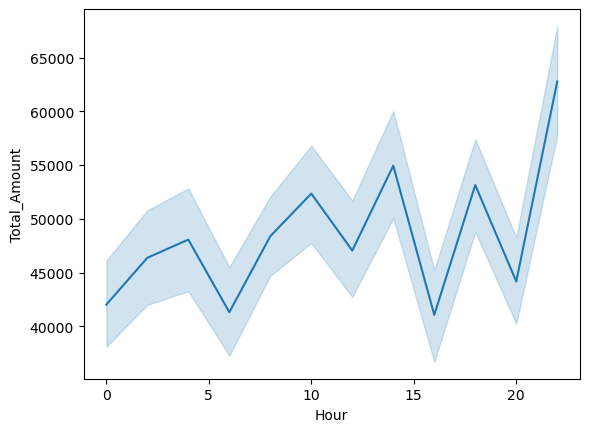

In [33]:
orders["Hour"] = orders["Order_Date"].dt.strftime("%H")
orders["Hour"] = orders["Hour"].astype("int")
orders = orders.sort_values(by = "Hour")
sns.lineplot(x = "Hour", y = "Total_Amount", data = orders, estimator=np.sum)
plt.show()

In [34]:
df = pd.merge(left = orders, right = customers, on = "Customer_ID", how = "inner")
df

,Order_ID,Restaurant_ID,Order_Date,Expected_Delivery_Time,Actual_Delivery_Time,Total_Amount,Order_Status,Payment_Method,Dish_Name,Customer_ID,Month,Hour,Customer_Location,Customer_Age_Group,Customer_Rating,Customer_Name
0,O0910,R022,2023-09-07 00:00:00,38,36,337.75,Completed,Cash,Garlic Naan,C127,September,0,Mumbai,26-35,3.4,Kabir Kapoor
1,O0963,R090,2023-09-10 00:00:00,45,43,744.56,Completed,Cash,Egg Fried Rice,C039,September,0,Pune,36-45,4.7,Dev Patel
2,O0316,R038,2023-01-03 00:00:00,35,38,566.36,Completed,UPI,Paneer Tikka,C009,January,0,Chennai,26-35,4.4,Dev Patel
3,O0735,R022,2023-08-31 00:00:00,38,45,692.84,Completed,UPI,Veg Manchurian,C003,August,0,Delhi,26-35,4.6,Mira Rao
4,O0435,R081,2023-02-20 00:00:00,44,28,399.67,Completed,UPI,Garlic Naan,C131,February,0,Chennai,26-35,3.5,Kavya Gupta
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,O0493,R005,2023-06-24 22:00:00,45,42,887.17,Completed,Net Banking,Butter Chicken,C193,June,22,Bangalore,46-55,4.2,Aanya Patel
996,O0496,R046,2023-06-08 22:00:00,39,39,577.66,Completed,Credit Card,Fish Curry,C132,June,22,Delhi,26-35,3.7,Riya Jain
997,O0693,R004,2023-10-03 22:00:00,31,27,756.62,Completed,Net Banking,Garlic Naan,C025,October,22,Chennai,26-35,3.4,Saanvi Chopra
998,O0724,R004,2023-06-29 22:00:00,29,44,926.22,Completed,Net Banking,Garlic Naan,C075,June,22,Hyderabad,18-25,4.1,Kabir Kapoor


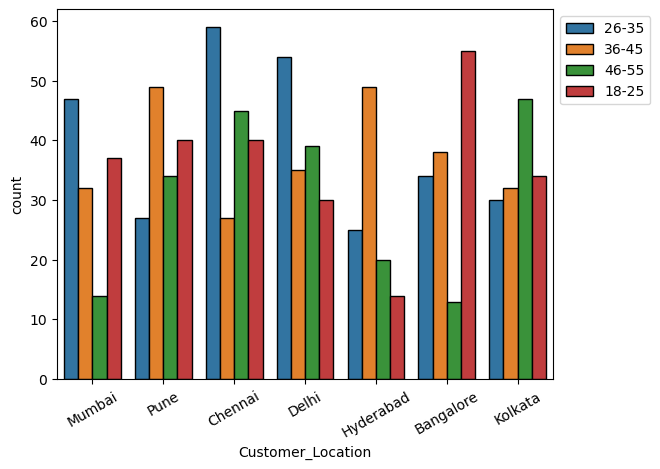

In [35]:
plt.figure.figsize=(20, 15)
sns.countplot(x="Customer_Location", data = df, hue = "Customer_Age_Group", edgecolor = "black")
plt.legend(bbox_to_anchor=(1,1))
plt.xticks(rotation=30)
plt.show()

In [36]:
restaurants

,Restaurant_ID,Name,Location,Cuisine_Types,Avg_Cost_for_Two,Ratings,Reviews_Count,Operational_Hours
0,R001,Brew Room,Mumbai,Continental,532,4.3,55,22:00-06:00
1,R002,Domino's Pizza,Chennai,American,939,4.1,483,11:00-22:30
2,R003,KFC,Chennai,Mexican,458,3.8,319,22:00-06:00
3,R004,Brew Room,Bangalore,Thai,280,3.0,84,09:00-23:00
4,R005,Mainland China,Delhi,American,560,4.9,401,11:00-22:30
...,...,...,...,...,...,...,...,...
95,R096,Lavaash by Saby,Mumbai,Japanese,286,4.0,77,00:00-23:59
96,R097,Mamagoto,Hyderabad,American,454,4.8,373,11:00-22:00
97,R098,Chili's,Pune,American,655,3.4,406,09:00-23:00
98,R099,Rajdhani Thali,Pune,"Indian, Chinese",847,3.7,314,11:00-22:00


In [37]:
restaurants.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Restaurant_ID      100 non-null    object 
 1   Name               100 non-null    object 
 2   Location           100 non-null    object 
 3   Cuisine_Types      100 non-null    object 
 4   Avg_Cost_for_Two   100 non-null    int64  
 5   Ratings            100 non-null    float64
 6   Reviews_Count      100 non-null    int64  
 7   Operational_Hours  100 non-null    object 
dtypes: float64(1), int64(2), object(5)
memory usage: 6.4+ KB


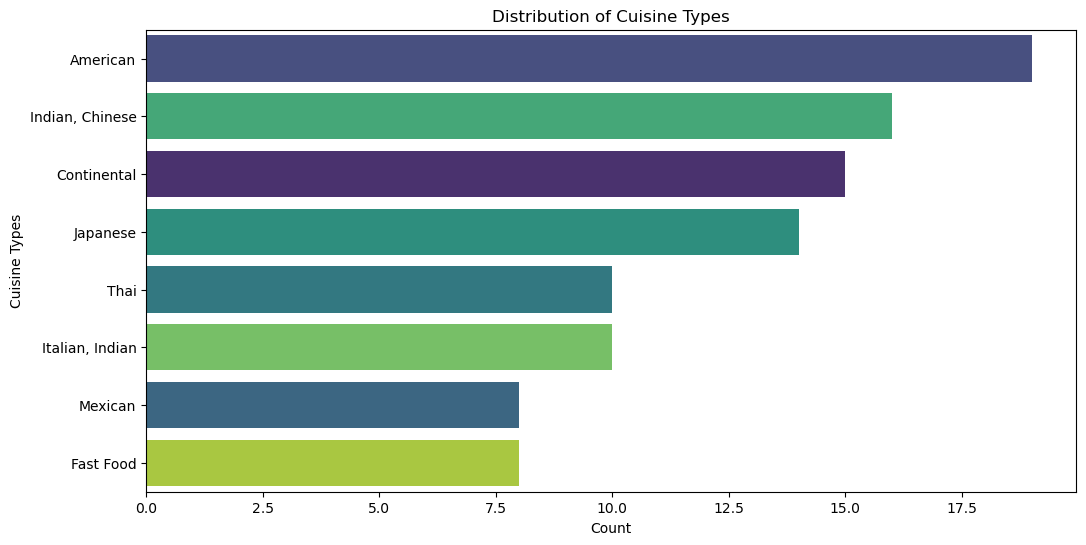

In [38]:
# Distribution of Cuisine Types
plt.figure(figsize=(12, 6))
sns.countplot(y='Cuisine_Types', data=restaurants, order=restaurants['Cuisine_Types'].value_counts().index, palette='viridis', hue = 'Cuisine_Types')
plt.title('Distribution of Cuisine Types')
plt.xlabel('Count')
plt.ylabel('Cuisine Types')
plt.show()

In [39]:
# Findind Top-rated restaurants in each location
top_rated_restaurants = restaurants.loc[restaurants.groupby("Location")["Ratings"].idxmax()][["Name", "Location", "Ratings"]]
print("Top rated restaurants by location:")
print(top_rated_restaurants)

Top rated restaurants by location:
                       Name   Location  Ratings
75  The Great Kebab Factory  Bangalore      4.8
33           Domino's Pizza    Chennai      5.0
4            Mainland China      Delhi      4.9
5               Sagar Ratna  Hyderabad      4.8
16            Indian Accent    Kolkata      4.9
49   Dindigul Thalappakatti     Mumbai      4.8
63          The Burger Club       Pune      4.8


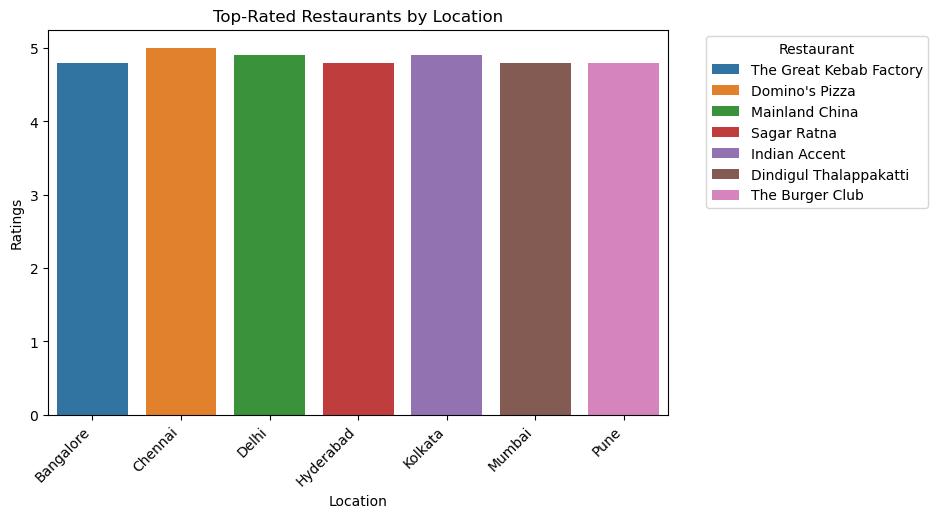

In [ ]:
# Plotting the top-rated restaurants by location
plt.figure(figsize=(8,3))
sns.barplot(x="Location", y="Ratings", hue="Name", data=top_rated_restaurants, dodge=False)
plt.xticks(rotation=30, ha="right")
plt.title("Top-Rated Restaurants by Location")
plt.xlabel("Location")
plt.ylabel("Ratings")
plt.legend(title="Restaurant", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [40]:
# Count the number of restaurants offering each cuisine type
cuisine_popularity = restaurants["Cuisine_Types"].value_counts()
print("Cuisine type popularity:")
print(cuisine_popularity)

# Average ratings by cuisine type
average_cuisine_ratings = restaurants.groupby("Cuisine_Types")["Ratings"].mean().sort_values(ascending=False)
print("Average ratings by cuisine type:")
print(average_cuisine_ratings)

Cuisine type popularity:
Cuisine_Types
American           19
Indian, Chinese    16
Continental        15
Japanese           14
Thai               10
Italian, Indian    10
Mexican             8
Fast Food           8
Name: count, dtype: int64
Average ratings by cuisine type:
Cuisine_Types
Continental        4.113333
American           4.063158
Indian, Chinese    3.962500
Japanese           3.957143
Mexican            3.950000
Fast Food          3.850000
Thai               3.650000
Italian, Indian    3.620000
Name: Ratings, dtype: float64


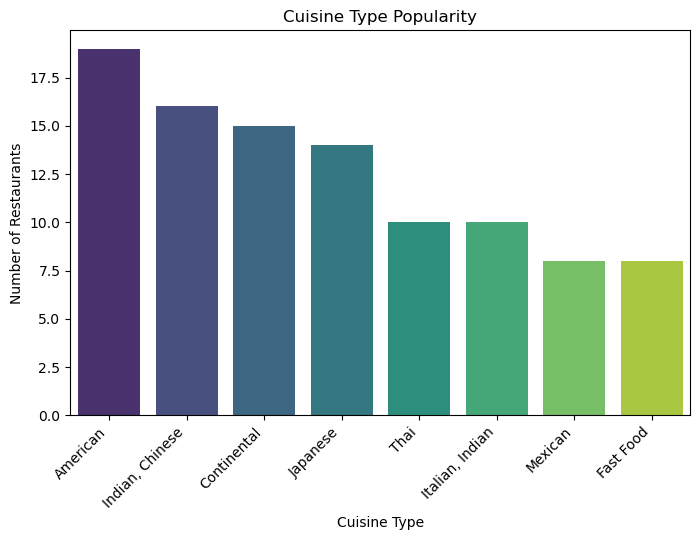

In [41]:
# Count the number of restaurants offering each cuisine type
cuisine_popularity = restaurants["Cuisine_Types"].value_counts()

# Plotting the popularity of each cuisine type
plt.figure(figsize=(8,5))
sns.barplot(x=cuisine_popularity.index, y=cuisine_popularity.values, palette="viridis", hue=cuisine_popularity.index)
plt.xticks(rotation=45, ha="right")
plt.title("Cuisine Type Popularity")
plt.xlabel("Cuisine Type")
plt.ylabel("Number of Restaurants")
plt.show()

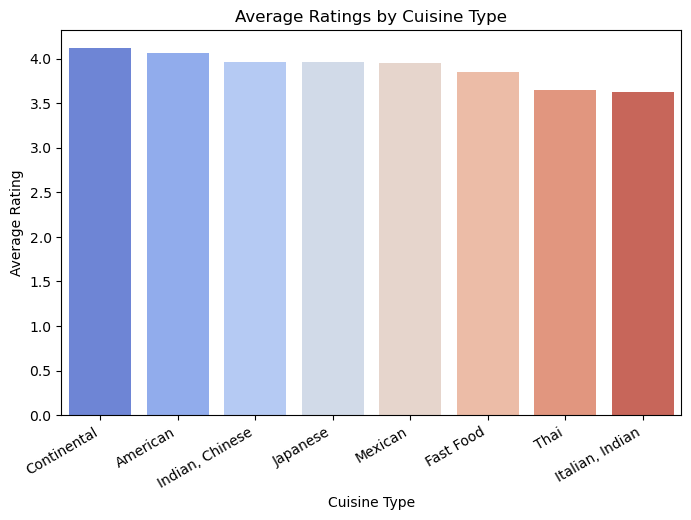

In [45]:
# Average ratings by cuisine type
average_cuisine_ratings = restaurants.groupby("Cuisine_Types")["Ratings"].mean().sort_values(ascending=False)

# Plotting the average ratings by cuisine type
plt.figure(figsize=(8,5))
sns.barplot(x=average_cuisine_ratings.index, y=average_cuisine_ratings.values, palette="coolwarm", hue=average_cuisine_ratings.index)
plt.xticks(rotation=30, ha="right")
plt.title("Average Ratings by Cuisine Type")
plt.xlabel("Cuisine Type")
plt.ylabel("Average Rating")
plt.show()

In [48]:
# Average cost for two by location
avg_cost_by_location = restaurants.groupby("Location")["Avg_Cost_for_Two"].mean().sort_values(ascending=False)
print("Average cost for two by location:")
print(avg_cost_by_location)

Average cost for two by location:
Location
Pune         615.277778
Delhi        574.642857
Hyderabad    554.916667
Chennai      548.266667
Kolkata      545.187500
Mumbai       490.642857
Bangalore    416.454545
Name: Avg_Cost_for_Two, dtype: float64


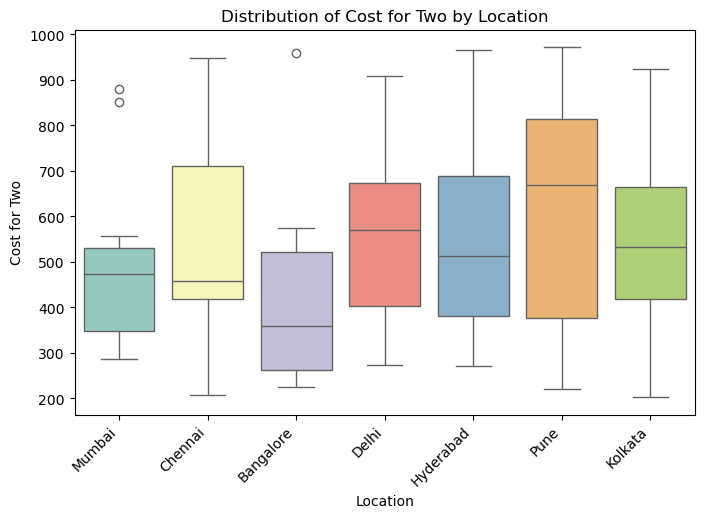

In [55]:
# Preparing data for the box plot
location_cost_data = restaurants[["Location", "Avg_Cost_for_Two"]]

plt.figure(figsize=(8,5))
sns.boxplot(x="Location", y="Avg_Cost_for_Two", data=location_cost_data, palette="Set3", hue="Location")
plt.xticks(rotation=45, ha="right")
plt.title("Distribution of Cost for Two by Location")
plt.xlabel("Location")
plt.ylabel("Cost for Two")
plt.show()


In [49]:
# Average cost for two by cuisine type
avg_cost_by_cuisine = restaurants.groupby("Cuisine_Types")["Avg_Cost_for_Two"].mean().sort_values(ascending=False)
print("Average cost for two by cuisine type:")
print(avg_cost_by_cuisine)

Average cost for two by cuisine type:
Cuisine_Types
Mexican            631.125000
Italian, Indian    582.500000
American           573.263158
Fast Food          564.625000
Continental        559.133333
Indian, Chinese    542.750000
Japanese           480.142857
Thai               410.000000
Name: Avg_Cost_for_Two, dtype: float64


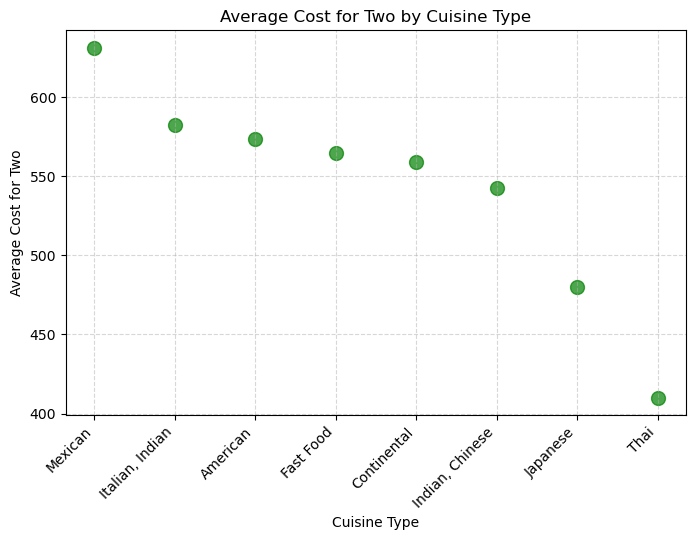

In [57]:
plt.figure(figsize=(8,5))
plt.scatter(avg_cost_by_cuisine.index, avg_cost_by_cuisine.values, color="green", s=100, alpha=0.7)
plt.xticks(rotation=45, ha="right")
plt.title("Average Cost for Two by Cuisine Type")
plt.xlabel("Cuisine Type")
plt.ylabel("Average Cost for Two")
plt.grid(True, linestyle='--', alpha=0.5)  # Adds dotted grid lines
plt.show()

Total and average reviews by location:
            sum        mean
Location                   
Pune       5577  309.833333
Kolkata    4209  263.062500
Delhi      4206  300.428571
Chennai    3735  249.000000
Hyderabad  3631  302.583333
Mumbai     3131  223.642857
Bangalore  2903  263.909091


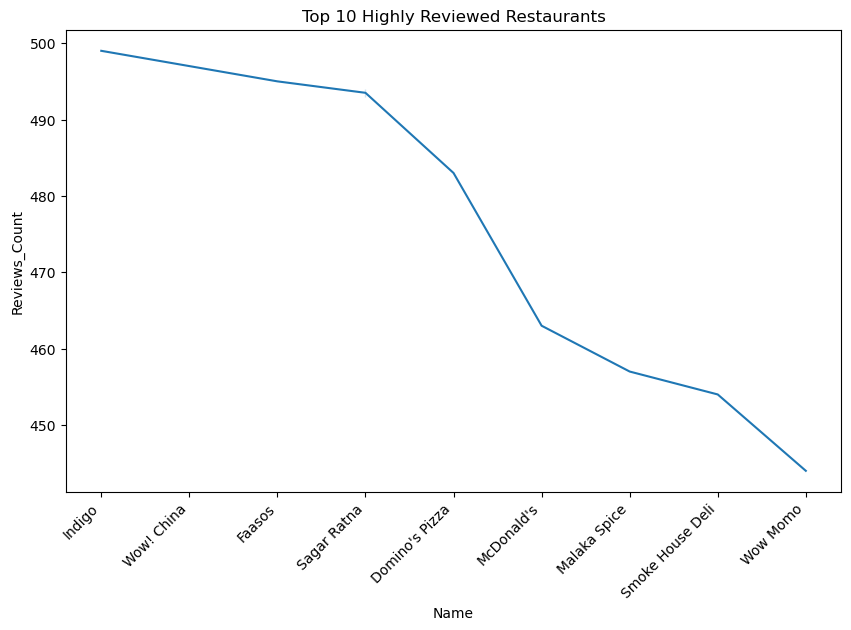

In [63]:
# Total and average reviews count by location
reviews_by_location = restaurants.groupby("Location")["Reviews_Count"].agg(["sum", "mean"]).sort_values(by="sum", ascending=False)
print("Total and average reviews by location:")
print(reviews_by_location)

# Visualize review counts to find highly reviewed restaurants
plt.figure(figsize=(10, 6))
sns.lineplot(x="Name", y="Reviews_Count", data=restaurants.sort_values("Reviews_Count", ascending=False).head(10))
plt.xticks(rotation=45, ha="right")
plt.title("Top 10 Highly Reviewed Restaurants")
plt.show()